# Úvodné predspracovanie dát verejných obstarávaní z viacerých tabuliek

In [ ]:
import pandas as pd

In [ ]:
# Nacitanie datovych suborov s verejnymi zakazkami a ich castami, databazou kodov CPV a pravnymi formami
contract = pd.read_csv("VVZ/contract.csv")

contract_part = pd.read_csv("VVZ/contract_part.csv")
contract_part_cpv = pd.read_csv("VVZ/contract_part_cpv.csv")

cpv = pd.read_csv("VVZ/cpv.csv")

finalne_ICO = pd.read_csv("finalne_ICO.csv", dtype=str)
pravne_formy = pd.read_csv("pravne-formy.csv", dtype=str)

## Spracovanie častí verejných zákaziek *(contract_part.csv)*

In [ ]:
# Ukazka dat casti verejnych obstaravani
contract_part.head()

,id,item_index,lot_number,title,description,nuts,eu_funded,contract_id
0,109f6c65-241a-42a0-add3-423f05a9117c,1,2,Údržba a opravy montovaného zábradlí,Údržba a opravy silničního dopravně bezpečnost...,CZ01,False,c8c19f84-4908-4173-a5f9-604b3548e4bf
1,e3546467-060e-4f81-8600-97b3824b5962,1,1,Respirátor FFP2 skládaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,NaN,False,931ef1ef-44da-4146-9b03-1113fd43a0cf
2,95106e27-6fd0-48a9-b5f9-558465a7263c,2,2,Respirátor FFP3 tvarovaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,NaN,False,931ef1ef-44da-4146-9b03-1113fd43a0cf
3,1bf0e869-8cc3-48ab-9027-b53d25f0707f,3,4,Respirátor FFP3 skládaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,NaN,False,931ef1ef-44da-4146-9b03-1113fd43a0cf
4,35216316-5bf8-40ac-a932-b855aa5b25d7,1,NaN,NaN,Předmětem plnění této veřejné zakázky je zabez...,CZ010,False,b5a30a3f-7648-4e18-8d74-8403eed25f8c


In [ ]:
# Vypis poctu prazdnych hodnot atributov v castiach verejnych obstaravani
print(len(contract_part))
contract_part.isnull().sum()

120635


id                 0
item_index         0
lot_number     54143
title          56639
description       54
nuts           62692
eu_funded          0
contract_id        0
dtype: int64

In [ ]:
# Priradenie kodov CPV jednotlivym castiam verejnych zakaziek z druheho DataFrame
parts_cpv_by_id = pd.merge(contract_part_cpv, cpv, left_on="cpv_code_base", right_on="code_base", how="left").drop(columns=["cpv_code_base", "code_base"])
parts_cpv_by_id.head()

,contract_part_id,code,cs,sk,pl
0,916de771-7fc4-4ac6-aa41-33d2ba0a95cf,77211400-6,Kácení stromů,Orezávanie stromov,Usługi wycinania drzew
1,a13a097f-359e-4c8c-a80e-85e9e66dfa27,39221000-7,Kuchyňské zařízení,Kuchynské vybavenie,Sprzęt kuchenny
2,22d65852-9ce7-4bc2-87fd-958d5ee5cb78,80000000-4,Vzdělávání a školení,Vzdelávacie a školiace (výcvikové) služby,Usługi edukacyjne i szkoleniowe
3,c1e84303-d390-4df7-926d-f62574c582fb,80000000-4,Vzdělávání a školení,Vzdelávacie a školiace (výcvikové) služby,Usługi edukacyjne i szkoleniowe
4,e5359f4b-ba61-4028-9784-2d01ba198bb2,80000000-4,Vzdělávání a školení,Vzdelávacie a školiace (výcvikové) služby,Usługi edukacyjne i szkoleniowe


In [ ]:
len(parts_cpv_by_id)

136298

In [ ]:
parts_with_cpv = pd.merge(contract_part, parts_cpv_by_id[["contract_part_id", "code", "cs"]], left_on="id", right_on="contract_part_id", how="inner")
parts_with_cpv.head(1)

,id,item_index,lot_number,title,description,nuts,eu_funded,contract_id,contract_part_id,code,cs
0,109f6c65-241a-42a0-add3-423f05a9117c,1,2,Údržba a opravy montovaného zábradlí,Údržba a opravy silničního dopravně bezpečnost...,CZ01,False,c8c19f84-4908-4173-a5f9-604b3548e4bf,109f6c65-241a-42a0-add3-423f05a9117c,45341000-9,Instalace a montáž zábradlí


In [ ]:
len(parts_with_cpv)

136298

In [ ]:
# Nahradenie prazdnych hodnot a odstranenie duplikatov casti obstaravani v DataFrame
parts_with_cpv = parts_with_cpv.fillna("")

parts_without_duplicates = parts_with_cpv[["contract_part_id", "title", "description", "contract_id", "code", "cs"]]
print(len(parts_without_duplicates))
parts_without_duplicates = parts_without_duplicates.drop_duplicates(subset=["title", "description", "code"], keep="first").reset_index(drop=True)
print(len(parts_without_duplicates))
parts_without_duplicates.tail(5)

136298
40307


,contract_part_id,title,description,contract_id,code,cs
40302,dde59563-1722-4810-8b79-db25a2e494a1,Minitendr RD-12/2017,Nákup kancelářského a drogistického zboží,935dfa78-c587-417d-a740-1ca90a858087,30199000-0,Kancelářské potřeby z papíru a ostatní zboží
40303,6e8a5553-b8f9-4b48-aad5-2b6a56c20297,,Předmětem zakázky je dodávka jednoho kusu Pojí...,1f9bd690-2dce-44e6-816f-4c125a1377bf,33100000-1,Zdravotnické přístroje
40304,edea0891-3503-4aef-a2f3-50fe0ef52596,,Poskytování dodatečných poradenských služeb so...,b6f97887-7411-494e-8fdb-0e78c2cdcbcf,71311210-6,Poradenství v oblasti dopravního stavitelství
40305,a1ac4f69-899f-44f7-88a4-1716312fa72d,,Realizace rekonstrukce stávajícího mostu z Mos...,e044965b-5a41-4760-a5aa-cea8b3806f80,44212120-6,Mostní konstrukce
40306,a1ac4f69-899f-44f7-88a4-1716312fa72d,,Realizace rekonstrukce stávajícího mostu z Mos...,e044965b-5a41-4760-a5aa-cea8b3806f80,45221119-9,Stavební úpravy při rekonstrukci mostů


In [ ]:
parts_without_duplicates = parts_without_duplicates.rename(columns={
    "contract_part_id": "part_id",
    "title": "part_title",
    "description": "part_description",
    "code": "part_cpv_code",
    "cs": "contract_cpv_description"
})

In [ ]:
parts_without_duplicates = parts_without_duplicates[["part_id", "contract_id", "part_title", "part_description", "part_cpv_code", "contract_cpv_description"]]

In [ ]:
parts_without_duplicates.head(5)

,part_id,contract_id,part_title,part_description,part_cpv_code,contract_cpv_description
0,109f6c65-241a-42a0-add3-423f05a9117c,c8c19f84-4908-4173-a5f9-604b3548e4bf,Údržba a opravy montovaného zábradlí,Údržba a opravy silničního dopravně bezpečnost...,45341000-9,Instalace a montáž zábradlí
1,e3546467-060e-4f81-8600-97b3824b5962,931ef1ef-44da-4146-9b03-1113fd43a0cf,Respirátor FFP2 skládaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,18142000-6,Ochranné obličejové masky
2,95106e27-6fd0-48a9-b5f9-558465a7263c,931ef1ef-44da-4146-9b03-1113fd43a0cf,Respirátor FFP3 tvarovaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,18142000-6,Ochranné obličejové masky
3,1bf0e869-8cc3-48ab-9027-b53d25f0707f,931ef1ef-44da-4146-9b03-1113fd43a0cf,Respirátor FFP3 skládaný bez výdechového ventilu,Předmětem plnění této veřejné zakázky je zabez...,18142000-6,Ochranné obličejové masky
4,ac7fb7d6-89c1-4ddf-979a-9e32b717f44e,b1313996-a9b7-4965-ace9-6aab2f93cb17,Rukavice vyšetřovací nitrilové bez pudru v pev...,Předmětem této části veřejné zakázky jsou průb...,33140000-3,Zdravotnický spotřební materiál


In [ ]:
# Vypis poctu prazdnych hodnot finalneho DataFrame, ktory uklada casti verejnych obstaravani
print(len(parts_without_duplicates))
parts_without_duplicates.isnull().sum()

40307


part_id                     0
contract_id                 0
part_title                  0
part_description            0
part_cpv_code               0
contract_cpv_description    0
dtype: int64

## Spracovanie hlavných záznamov verejných zákaziek *(contract.csv)*

In [ ]:
# Ukazka dat zaznamov hlavnych verejnych obstaravani
contract.head()

,id,is_framework_agreement,dps_used,fa_dps_involved,eauction_used,subject_type,procedure_type,has_parts,title,description,eu_funded,cpv_base_main,estimated_cost_value,estimated_cost_currency,final_cost_value,final_cost_currency,created_at,updated_at,raw_notice_id
0,827fd5d9-b88c-4871-8714-692a04f32cf7,False,NaN,NaN,NaN,WORKS,PT_SIMPLIFIED_CONTRACT,False,Oprava bytových jader ve 2. NP v objektu B 30 ...,Kompletní oprava 15 bytových jader ve 2. NP bu...,False,45453000,5911731.00,NaN,5739959.20,NaN,2023-07-21 17:22:52.879,NaN,6dcb922a-2b7c-4041-913b-5a954374f96c
1,875c9c26-1a3f-49bc-ae89-55b317a21b64,False,NaN,NaN,NaN,WORKS,PT_OPEN,False,Dům Chopin - rekonstrukce objektu - 2. etapa,Předmětem veřejné zakázky jsou stavební práce ...,True,45454100,51000000.00,NaN,51828918.44,NaN,2023-07-21 17:22:53.522,NaN,f5278ba8-da54-410f-89e9-9afdd75b7b6a
2,14d79674-7702-4309-8a68-d2a8a508ff16,False,NaN,NaN,NaN,SUPPLIES,PT_SIMPLIFIED_CONTRACT,True,UČEBNA FYZIKY; REGISTRAČNÍ ČÍSLO PROJEKTU: CZ....,Předmětem plnění této veřejné zakázky je dodáv...,True,39160000,3303827.72,NaN,2720899.62,NaN,2023-07-21 17:22:54.093,NaN,bd753938-637f-4e36-bf95-baabb4b0308a
3,bb8b98ab-754c-4afa-8106-c153e13e7efc,False,False,NaN,True,SERVICES,PT_RESTRICTED,False,DATA_VPN PL_4357,Datové služby umožňující datovou komunikaci se...,NaN,64200000,NaN,NaN,749952.00,CZK,2023-07-21 17:22:55.828,NaN,d7284c6d-247b-4f4a-9bd5-5ff7c02c5a0f
4,d365ebe6-cde8-408c-856d-6b496e103f49,False,False,NaN,False,SERVICES,PT_OPEN,True,Uzavření rámcových dohod na těžbu motorovou pi...,Předmětem veřejné zakázky je uzavření rámcovýc...,NaN,77211400,NaN,NaN,17082000.00,CZK,2023-07-21 17:22:56.245,NaN,8d8e0e21-13d3-41ac-8cd5-ea670056f66f


In [ ]:
# Vypis poctu prazdnych hodnot atributov v hlavnych verejnych obstaravaniach
print(len(contract))
contract.isnull().sum()

117086


id                              0
is_framework_agreement          0
dps_used                    43279
fa_dps_involved            117086
eauction_used               43279
subject_type                    0
procedure_type               2541
has_parts                       0
title                           0
description                    14
eu_funded                   73807
cpv_base_main                   0
estimated_cost_value        81791
estimated_cost_currency    117086
final_cost_value            17652
final_cost_currency         54384
created_at                      0
updated_at                 117086
raw_notice_id                   0
dtype: int64

In [ ]:
# Pripojenie zaradenia do klasifikacnej schemy CPV k zaznamom verejnych zakaziek
contract_with_cpv = pd.merge(contract, cpv, left_on="cpv_base_main", right_on="code_base", how="left").drop(columns=["code_base", "sk", "pl"])
contract_with_cpv.head()

,id,is_framework_agreement,dps_used,fa_dps_involved,eauction_used,subject_type,procedure_type,has_parts,title,description,...,cpv_base_main,estimated_cost_value,estimated_cost_currency,final_cost_value,final_cost_currency,created_at,updated_at,raw_notice_id,code,cs
0,827fd5d9-b88c-4871-8714-692a04f32cf7,False,NaN,NaN,NaN,WORKS,PT_SIMPLIFIED_CONTRACT,False,Oprava bytových jader ve 2. NP v objektu B 30 ...,Kompletní oprava 15 bytových jader ve 2. NP bu...,...,45453000,5911731.00,NaN,5739959.20,NaN,2023-07-21 17:22:52.879,NaN,6dcb922a-2b7c-4041-913b-5a954374f96c,45453000-7,Opravy a modernizace budov
1,875c9c26-1a3f-49bc-ae89-55b317a21b64,False,NaN,NaN,NaN,WORKS,PT_OPEN,False,Dům Chopin - rekonstrukce objektu - 2. etapa,Předmětem veřejné zakázky jsou stavební práce ...,...,45454100,51000000.00,NaN,51828918.44,NaN,2023-07-21 17:22:53.522,NaN,f5278ba8-da54-410f-89e9-9afdd75b7b6a,45454100-5,Rekonstrukce budov
2,14d79674-7702-4309-8a68-d2a8a508ff16,False,NaN,NaN,NaN,SUPPLIES,PT_SIMPLIFIED_CONTRACT,True,UČEBNA FYZIKY; REGISTRAČNÍ ČÍSLO PROJEKTU: CZ....,Předmětem plnění této veřejné zakázky je dodáv...,...,39160000,3303827.72,NaN,2720899.62,NaN,2023-07-21 17:22:54.093,NaN,bd753938-637f-4e36-bf95-baabb4b0308a,39160000-1,Školní nábytek
3,bb8b98ab-754c-4afa-8106-c153e13e7efc,False,False,NaN,True,SERVICES,PT_RESTRICTED,False,DATA_VPN PL_4357,Datové služby umožňující datovou komunikaci se...,...,64200000,NaN,NaN,749952.00,CZK,2023-07-21 17:22:55.828,NaN,d7284c6d-247b-4f4a-9bd5-5ff7c02c5a0f,64200000-8,Telekomunikační služby
4,d365ebe6-cde8-408c-856d-6b496e103f49,False,False,NaN,False,SERVICES,PT_OPEN,True,Uzavření rámcových dohod na těžbu motorovou pi...,Předmětem veřejné zakázky je uzavření rámcovýc...,...,77211400,NaN,NaN,17082000.00,CZK,2023-07-21 17:22:56.245,NaN,8d8e0e21-13d3-41ac-8cd5-ea670056f66f,77211400-6,Kácení stromů


In [ ]:
# Odstranenie duplicitnych trojic hodnot atributov "nazov - popis - CPVkod" v zaznamoch hlavnych verejnych obstaravani
contract_without_duplicates = contract_with_cpv[["id", "subject_type", "title", "description", "code", "cs"]]
contract_without_duplicates = contract_without_duplicates.drop_duplicates(subset=["title", "description", "code"], keep="first").reset_index(drop=True)
contract_without_duplicates.head(5)

,id,subject_type,title,description,code,cs
0,827fd5d9-b88c-4871-8714-692a04f32cf7,WORKS,Oprava bytových jader ve 2. NP v objektu B 30 ...,Kompletní oprava 15 bytových jader ve 2. NP bu...,45453000-7,Opravy a modernizace budov
1,875c9c26-1a3f-49bc-ae89-55b317a21b64,WORKS,Dům Chopin - rekonstrukce objektu - 2. etapa,Předmětem veřejné zakázky jsou stavební práce ...,45454100-5,Rekonstrukce budov
2,14d79674-7702-4309-8a68-d2a8a508ff16,SUPPLIES,UČEBNA FYZIKY; REGISTRAČNÍ ČÍSLO PROJEKTU: CZ....,Předmětem plnění této veřejné zakázky je dodáv...,39160000-1,Školní nábytek
3,bb8b98ab-754c-4afa-8106-c153e13e7efc,SERVICES,DATA_VPN PL_4357,Datové služby umožňující datovou komunikaci se...,64200000-8,Telekomunikační služby
4,d365ebe6-cde8-408c-856d-6b496e103f49,SERVICES,Uzavření rámcových dohod na těžbu motorovou pi...,Předmětem veřejné zakázky je uzavření rámcovýc...,77211400-6,Kácení stromů


In [ ]:
# Vypis poctu prazdnych hodnot atributov v hlavnych verejnych obstaravaniach po odstraneni duplikatov
print(len(contract_without_duplicates))
contract_without_duplicates.isnull().sum()

41100


id              0
subject_type    0
title           0
description     8
code            0
cs              0
dtype: int64

In [ ]:
contract_parts_counts = parts_without_duplicates["contract_id"].value_counts()
contract_without_duplicates["parts"] = contract_without_duplicates["id"].map(contract_parts_counts).fillna(0).astype(int)

In [ ]:
contract_without_duplicates = contract_without_duplicates[["id", "parts", "subject_type", "title", "description", "code", "cs"]]

In [ ]:
contract_without_duplicates.tail()

,id,parts,subject_type,title,description,code,cs
41095,aa498717-5f24-4891-a15f-4243c509c10d,0,WORKS,"Mrlina, Vestec - Rožďalovice, zvýšení ochrany ...",Realizace suché retenční nádrže Mlýnec na vod...,45246400-7,Prevence záplav
41096,0f3b9f08-6a70-42ca-b6e9-798087b8d2d8,2,SUPPLIES,"React - EU- Modernizace Nemocnice Prachatice, ...",Předmětem veřejné zakázky je modernizace příst...,33100000-1,Zdravotnické přístroje
41097,a86f3f27-6219-4e21-9c1f-c3294b207cd3,0,SERVICES,Interakční prvky Uherský Brod,Předmětem veřejné zakázky na služby je doplněn...,77300000-3,Zahradnické služby
41098,070413e7-75a0-44e9-97aa-4df73be2a3a8,1,SUPPLIES,501 posypy - nákup kamenné soli (NaCl) v silov...,Nákup kamenné soli v silovozech pro zimní údržbu.,34927100-2,Posypová sůl
41099,81141cfd-98d4-4726-8e37-7aa3049390a0,0,SERVICES,Kosení travních porostů oblast II Cheb - 3/2020,Kosení travních porostů (sečení trávy) - odstr...,50230000-6,Opravy a údržba silnic a dalších zařízení a so...


In [ ]:
contractors_info = pd.read_csv("obstaravatelia_ciste.csv")

In [ ]:
# Pridanie informacii o verejnom obstaravatelovi ku kazdemu verejnemu obstaravaniu
contract_with_authorities = pd.merge(contract_without_duplicates, contractors_info, left_on="id", right_on="contract_id", how="left").drop(columns=["contract_id"])
contract_with_authorities = contract_with_authorities.rename(columns={"identifikator": "contracting_authority_id"})

In [ ]:
contract_with_authorities.head(5)

,id,parts,subject_type,title,description,code,cs,contracting_authority_id,obchodni_jmeno,pravni_forma,nazev_obce
0,827fd5d9-b88c-4871-8714-692a04f32cf7,0,WORKS,Oprava bytových jader ve 2. NP v objektu B 30 ...,Kompletní oprava 15 bytových jader ve 2. NP bu...,45453000-7,Opravy a modernizace budov,CZ-64422402,Vyšší policejní škola a Střední policejní škol...,325,Holešov
1,875c9c26-1a3f-49bc-ae89-55b317a21b64,0,WORKS,Dům Chopin - rekonstrukce objektu - 2. etapa,Předmětem veřejné zakázky jsou stavební práce ...,45454100-5,Rekonstrukce budov,CZ-00254061,Město Mariánské Lázně,801,Mariánské Lázně
2,14d79674-7702-4309-8a68-d2a8a508ff16,0,SUPPLIES,UČEBNA FYZIKY; REGISTRAČNÍ ČÍSLO PROJEKTU: CZ....,Předmětem plnění této veřejné zakázky je dodáv...,39160000-1,Školní nábytek,CZ-60611715,Šafránkova základní škola a mateřská škola Nal...,331,Nalžovské Hory
3,bb8b98ab-754c-4afa-8106-c153e13e7efc,0,SERVICES,DATA_VPN PL_4357,Datové služby umožňující datovou komunikaci se...,64200000-8,Telekomunikační služby,CZ-00007064,Ministerstvo vnitra,325,Praha
4,d365ebe6-cde8-408c-856d-6b496e103f49,0,SERVICES,Uzavření rámcových dohod na těžbu motorovou pi...,Předmětem veřejné zakázky je uzavření rámcovýc...,77211400-6,Kácení stromů,CZ-00088455,Správa Krkonošského národního parku,332,Vrchlabí


In [ ]:
# Vypis poctu verejnych obstaravani podla ich druhu (produkty, sluzby, stavebne prace)
contract_with_authorities["contract_subject_type"].value_counts().head(10)

SUPPLIES    19627
WORKS       10965
SERVICES    10508
Name: contract_subject_type, dtype: int64

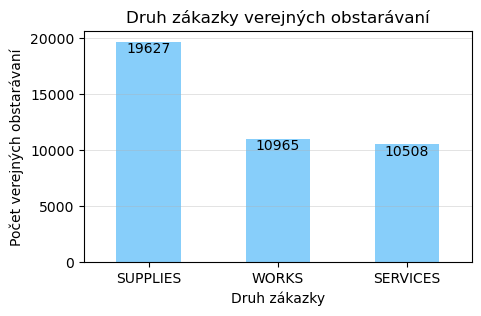

In [ ]:
# Vizualizacia stlpcoveho diagramu poctov zakaziek podla druhu (produkty, sluzby, stavebne prace)
import matplotlib.pyplot as plt

value_counts = contract_with_authorities["contract_subject_type"].value_counts()

plt.figure(figsize=(5, 3))
value_counts.plot(kind="bar", color="lightskyblue")
plt.xlabel("Druh zákazky")
plt.ylabel("Počet verejných obstarávaní")
plt.grid(axis="y", alpha=0.5, linewidth=0.5)
plt.xticks(rotation=0)
plt.title("Druh zákazky verejných obstarávaní")

for i, v in enumerate(value_counts):
    plt.text(i, v + 0.1, str(v), ha="center", va="top")

plt.show()

In [ ]:
contract_with_authorities[contract_with_authorities["contract_title"].str.contains("Pronájem provozní infrastruktury pro webové aplikace")]

,contract_id,contract_parts,contract_subject_type,contract_title,contract_description,contract_cpv_code,contract_cpv_description,contracting_authority_id,obchodni_jmeno,pravni_forma,nazev_obce
4202,21338a17-95bb-4a12-8653-a5d35813cc18,0,SERVICES,Pronájem provozní infrastruktury pro webové ap...,Předmětem veřejné zakázky je zajistit službu p...,72415000-2,Webová operační hostingové služby,CZ-45245053,ČESKÝ ROZHLAS,361,Praha
15363,18552ee5-4e11-45ba-8a83-6cc17d63b516,0,SERVICES,Pronájem provozní infrastruktury pro webové ap...,Předmětem veřejné zakázky je zajistit službu p...,72415000-2,Webová operační hostingové služby,CZ-45245053,ČESKÝ ROZHLAS,361,Praha


In [ ]:
# Spojenie identifikatorov ICO so ziskanymi informaciami z Administrativneho registru ekonomickych subjektov
pouzite_ica = contract_with_authorities[["contracting_authority_id", "obchodni_jmeno", "pravni_forma", "nazev_obce"]].copy()
pouzite_ica = pouzite_ica.drop_duplicates(subset=["contracting_authority_id"])
pouzite_ica = pouzite_ica.dropna(how="any")

pouzite_ica["pravni_forma"] = pouzite_ica["pravni_forma"].replace(["101", "102", "105", "107"], "100")
pouzite_ica = pd.merge(pouzite_ica, pravne_formy, left_on="pravni_forma", right_on="kod", how="left").drop(columns=["kod"])

pouzite_ica

,contracting_authority_id,obchodni_jmeno,pravni_forma,nazev_obce,popis
0,CZ-64422402,Vyšší policejní škola a Střední policejní škol...,325,Holešov,Organizační složka státu
1,CZ-00254061,Město Mariánské Lázně,801,Mariánské Lázně,Obec
2,CZ-60611715,Šafránkova základní škola a mateřská škola Nal...,331,Nalžovské Hory,Příspěvková organizace zřízená územním samospr...
3,CZ-00007064,Ministerstvo vnitra,325,Praha,Organizační složka státu
4,CZ-00088455,Správa Krkonošského národního parku,332,Vrchlabí,Státní příspěvková organizace
...,...,...,...,...,...
4953,CZ-00666955,Obec Příbraz,801,Příbraz,Obec
4954,CZ-49704281,"CYKLOMAX, spol.s.r.o.",112,Praha,Společnost s ručením omezeným
4955,CZ-72547111,Michal Kakos,100,Vlašim,Podnikající fyzická osoba tuzemská
4956,CZ-00275166,OBEC OHNIŠOV,801,Ohnišov,Obec


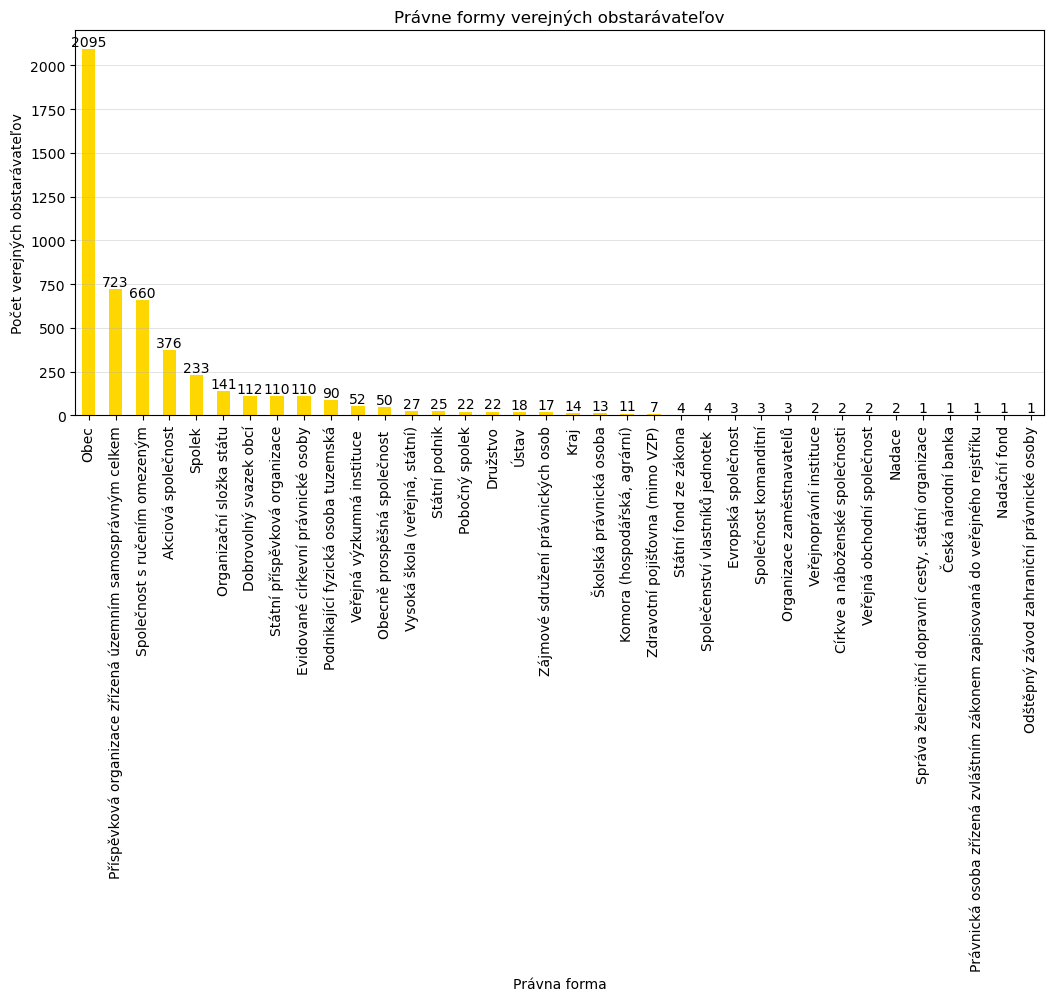

In [ ]:
# Vizualizacia stlpcoveho grafu poctu obstaravatelov podla ich právnej formy v nasej datovej vzorke
value_counts = pouzite_ica["popis"].value_counts()

plt.figure(figsize=(12.5, 5))
value_counts.plot(kind="bar", color="gold")
plt.xlabel("Právna forma")
plt.ylabel("Počet verejných obstarávateľov")
plt.grid(axis="y", alpha=0.5, linewidth=0.5)
plt.xticks(rotation=90)
plt.title("Právne formy verejných obstarávateľov")

for i, v in enumerate(value_counts):
    plt.text(i, v + 0.1, str(v), ha="center", va="bottom")

plt.show()

In [ ]:
pouzite_ica["pravni_forma"].unique()

array(['325', '801', '331', '332', '771', '804', '601', '121', '301',
       '391', '932', '751', '706', '361', '112', '661', '722', '205',
       '641', '381', '352', '141', '313', '736', '745', '145', '100',
       '113', '960', '161', '708', '721', '111', '117', '118', '421'],
      dtype=object)

In [ ]:
contract_with_authorities = contract_with_authorities.rename(columns={
    "id": "contract_id",
    "parts": "contract_parts",
    "subject_type": "contract_subject_type",
    "title": "contract_title",
    "description": "contract_description",
    "code": "contract_cpv_code",
    "cs": "contract_cpv_description"
})

In [ ]:
contract_with_authorities = contract_with_authorities[["contract_id", "contract_title", "contract_description", "contract_parts", "contract_cpv_code", "contract_cpv_description", "contract_subject_type", "contracting_authority_id"]]

In [ ]:
contract_with_authorities.tail(5)

,contract_id,contract_title,contract_description,contract_parts,contract_cpv_code,contract_cpv_description,contract_subject_type,contracting_authority_id
41095,aa498717-5f24-4891-a15f-4243c509c10d,"Mrlina, Vestec - Rožďalovice, zvýšení ochrany ...",Realizace suché retenční nádrže Mlýnec na vod...,0,45246400-7,Prevence záplav,WORKS,CZ-70890005
41096,0f3b9f08-6a70-42ca-b6e9-798087b8d2d8,"React - EU- Modernizace Nemocnice Prachatice, ...",Předmětem veřejné zakázky je modernizace příst...,2,33100000-1,Zdravotnické přístroje,SUPPLIES,CZ-26095165
41097,a86f3f27-6219-4e21-9c1f-c3294b207cd3,Interakční prvky Uherský Brod,Předmětem veřejné zakázky na služby je doplněn...,0,77300000-3,Zahradnické služby,SERVICES,NaN
41098,070413e7-75a0-44e9-97aa-4df73be2a3a8,501 posypy - nákup kamenné soli (NaCl) v silov...,Nákup kamenné soli v silovozech pro zimní údržbu.,1,34927100-2,Posypová sůl,SUPPLIES,NaN
41099,81141cfd-98d4-4726-8e37-7aa3049390a0,Kosení travních porostů oblast II Cheb - 3/2020,Kosení travních porostů (sečení trávy) - odstr...,0,50230000-6,Opravy a údržba silnic a dalších zařízení a so...,SERVICES,CZ-65993390


In [ ]:
print(len(contract_with_authorities))
contract_with_authorities.isnull().sum()

41100


contract_id                   0
contract_title                0
contract_description          8
contract_parts                0
contract_cpv_code             0
contract_cpv_description      0
contract_subject_type         0
contracting_authority_id    812
dtype: int64

In [ ]:
contract_with_authorities["contract_title"].value_counts()

Dodávka zemního plynu v rámci sdružených služeb dodávky zemního plynu na rok 2023    37
Dodávka elektřiny v rámci sdružených služeb dodávky elektřiny na rok 2023            30
Dodávka zemního plynu v rámci sdružených služeb dodávky zemního plynu na rok 2022    12
Dodávka zemního plynu v rámci sdružených služeb dodávky zemního plynu na rok 2019    10
Dodávka elektřiny v rámci sdružených služeb dodávky elektřiny na rok 2021 a 2022     10
                                                                                     ..
SVATÝ JAN NAD MALŠÍ - INTENZIFIKACE ČOV                                               1
Rekonstrukce plynové kotelny  1.  ZŠ Milevsko                                         1
Dodávky spotřebního materiálu k insuflátoru Aesculap PG150                            1
Podpora, nutný rozvoj a ukončení OKaplikací rezortu MPSV                              1
Kosení travních porostů oblast II Cheb - 3/2020                                       1
Name: contract_title, Length: 38

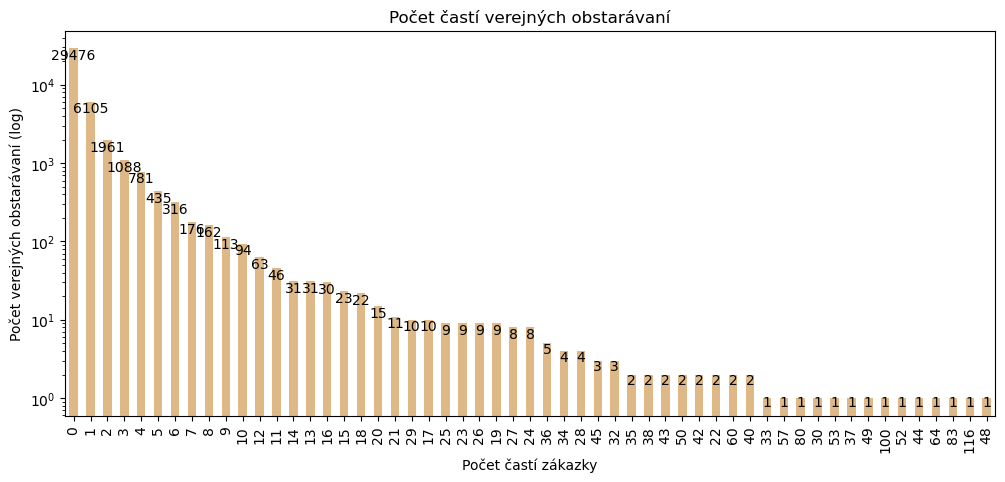

In [ ]:
# Vizualizacia stlpcoveho diagramu poctu verejnych obstaravani podla poctu casti
import matplotlib.pyplot as plt

value_counts = contract_with_authorities["contract_parts"].value_counts()

plt.figure(figsize=(12, 5))
value_counts.plot(kind="bar", logy=True, color="burlywood")
plt.xlabel("Počet častí zákazky")
plt.ylabel("Počet verejných obstarávaní (log)")
plt.title("Počet častí verejných obstarávaní")

plt.show()

In [ ]:
# Ulozenie hlavnych zaznamov verejnych zakaziek do samostatneho CSV suboru
contract_with_authorities.to_csv("contract_with_authorities.csv", encoding="utf-8", index=False)

In [ ]:
# Ulozenie casti verejnych zakaziek do samostatneho CSV suboru
common_values = parts_without_duplicates["contract_id"].isin(contract_with_authorities["contract_id"])
parts_without_duplicates_filtered = parts_without_duplicates[common_values]
parts_without_duplicates.drop(parts_without_duplicates[~common_values].index, inplace=True)

parts_without_duplicates.to_csv("parts_final.csv", encoding="utf-8", index=False)

In [ ]:
# Vypis poctu jedinecnych hodnot dvojic atribútov - verejne zákazky s viacerymi priradenymi kodmi
parts_without_duplicates[["part_id", "contract_id"]].value_counts()

part_id                               contract_id                         
a53b7697-0945-4fe7-a8e0-d8e497310f5f  a142e199-cae0-47d6-8772-09da149ceddb    64
bca0e228-4f4d-498d-b7ea-aebf38e256db  de512c52-ca85-4e1d-a79e-a06ed3643aa5    60
4190dd13-20d0-4d12-9564-1cfab71bfd0d  86aaba46-34ae-4db4-b81c-fa8f4291ed2c    60
9c420e1d-370d-47f3-9938-3238d0f82600  8f02c407-9b39-409f-9937-23edb44c6db4    44
22e3ecc1-e189-4518-965e-3912e2198d23  acb4a289-758b-4377-8a51-a54c9689df1a    34
                                                                              ..
5e06a510-964c-4c7c-bbee-0d269e699930  de7ac4f8-4ee5-4a45-b7be-2fda6acdda7e     1
5e03ffb9-e04f-44a9-ab1b-8b03234354b5  5a69d06f-c81d-4185-aa0a-29e42ec0ad87     1
5dee2872-8cf2-4c11-a494-aeb3b06b8784  a8e13ab6-cfd1-4375-b7ec-9a794406131d     1
5dea9cdd-3add-47fd-9f27-de5c9b3504bb  a0a7af39-ce7c-46f4-861e-ab04dae428ac     1
fffbd1e2-15e3-4549-a8b6-948fea249621  4da76be4-fe7b-4694-8f21-488b73c6949e     1
Length: 22313, dtype: int64